In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBRegressor


In [6]:
df_test=pd.read_csv("house_price_test.csv")
df_train=pd.read_csv("house_price_train.csv")
print("Train shape:",df_train.shape)
print("Test Shape:",df_test.shape)

Train shape: (1460, 81)
Test Shape: (1459, 80)


In [7]:
#Separate features and target

X=df_train.drop(["SalePrice"], axis=1)
y=df_train.SalePrice

C:\Users\MANOHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


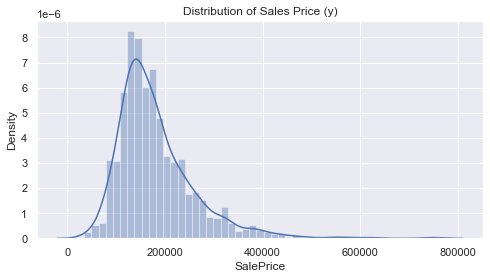

In [8]:
# Distribution of Saleprice

plt.figure(figsize=(8,4))
plt.title("Distribution of Sales Price (y)")
sns.distplot(y)
plt.show()

-  y is right-skewed

##### log transform can be applied to make (y) to normal distribution.

C:\Users\MANOHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


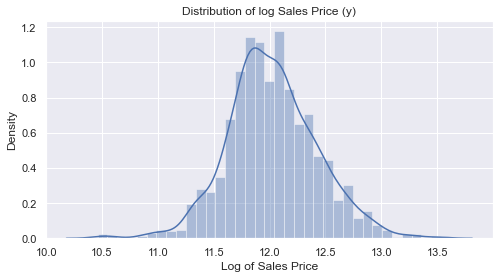

In [9]:
y=np.log1p(y)

plt.figure(figsize=(8,4))
plt.title("Distribution of log Sales Price (y)")
sns.distplot(y)
plt.xlabel("Log of Sales Price")
plt.show()


#### Percentage of null valued features in Train data

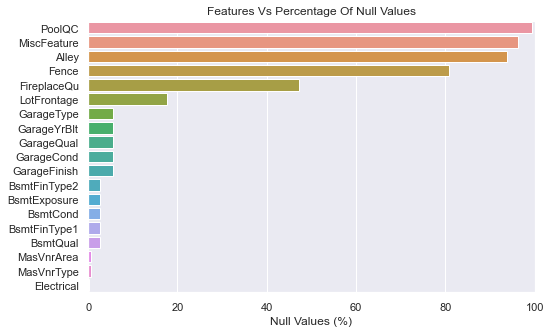

In [10]:
d_temp=X.isna().sum().sort_values(ascending=False)
d_temp=d_temp[d_temp>0]
d_temp=d_temp/df_train.shape[0]*100

plt.figure(figsize=(8,5))
plt.title("Features Vs Percentage Of Null Values")
sns.barplot(y=d_temp.index,x=d_temp, orient='h')
plt.xlim(0,100)
plt.xlabel("Null Values (%)")
plt.show()

In [11]:
#Drop features where more than 20% records are null

na_index=(d_temp[d_temp>20]).index
X.drop(na_index, axis=1, inplace=True)

In [12]:
#Split Categorical and Numeric Features

num_cols=X.corrwith(y).abs().sort_values(ascending=False).index
X_num=X[num_cols]
X_cat=X.drop(num_cols,axis=1)

In [13]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


In [14]:
X_num

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,...,PoolArea,MoSold,3SsnPorch,LowQualFinSF,YrSold,OverallCond,MiscVal,Id,BsmtHalfBath,BsmtFinSF2
0,7,1710,2,548,856,856,2,2003,2003,2003.0,...,0,2,0,0,2008,5,0,1,0,0
1,6,1262,2,460,1262,1262,2,1976,1976,1976.0,...,0,5,0,0,2007,8,0,2,1,0
2,7,1786,2,608,920,920,2,2001,2002,2001.0,...,0,9,0,0,2008,5,0,3,0,0
3,7,1717,3,642,756,961,1,1915,1970,1998.0,...,0,2,0,0,2006,5,0,4,0,0
4,8,2198,3,836,1145,1145,2,2000,2000,2000.0,...,0,12,0,0,2008,5,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,1999,2000,1999.0,...,0,8,0,0,2007,5,0,1456,0,0
1456,6,2073,2,500,1542,2073,2,1978,1988,1978.0,...,0,2,0,0,2010,6,0,1457,0,163
1457,7,2340,1,252,1152,1188,2,1941,2006,1941.0,...,0,5,0,0,2010,9,2500,1458,0,0
1458,5,1078,1,240,1078,1078,1,1950,1996,1950.0,...,0,4,0,0,2010,6,0,1459,0,1029


In [15]:
#Identify Features Highly correlated with target

high_corr_num=X_num.corrwith(y)[X_num.corrwith(y).abs()>0.5].index
X_num=X_num[high_corr_num]

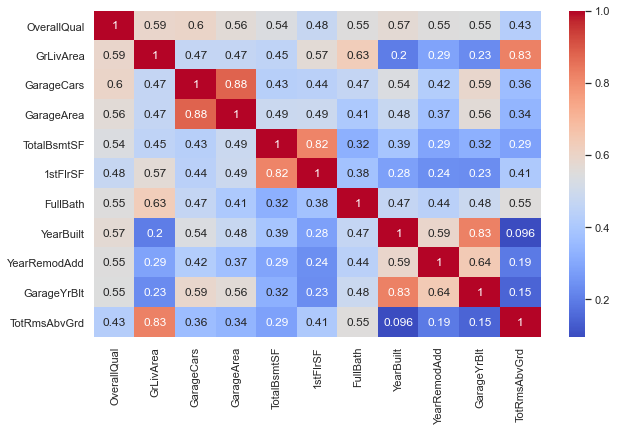

Correlation of Each feature with target


OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
dtype: float64

In [17]:
# Heat-map of highly correlated Features
plt.figure(figsize=(10,6))
sns.heatmap(X_num.corr(), annot=True, cmap='coolwarm')
plt.show()

print("Correlation of Each feature with target")
X_num.corrwith(y)

In [18]:
#Removing multi-colinear features
X_num=X_num[high_corr_num]
X_num.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF','GarageYrBlt'],axis=1, inplace=True)

In [19]:
#function to handle NA
def handle_na(df, func):
    """
    eg: df=handle_na(df, 'mean')
    """
    na_cols=df.columns[df.isna().sum()>0]
    for col in na_cols:
        if func=='mean':
            df[col]=df[col].fillna(df[col].mean())
        if func=='mode':
            df[col]=df[col].fillna(df[col].mode()[0])
    return df

In [20]:
X_num=handle_na(X_num, 'mean')

In [21]:
# Function to scale df 
def scale_df(df):
    """
    eg: df=scale_df(df)
    """
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(np.array(df[col]).reshape(-1,1))
    return df

In [22]:
X_num=scale_df(X_num)

#### Model Testing : Only Numerical Features

In [24]:
X_train, X_val, y_train, y_val=train_test_split(X_num,y, test_size=0.2)

In [25]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.8357539408348931
Validation score : 0.7357846709372526


In [26]:
model=SVR()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.8658079759767221
Validation score : 0.8790535192653691


In [27]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.9742676998974822
Validation score : 0.8472501646769046


In [28]:
model=XGBRegressor(learning_rate=0.1)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.9529356541987946
Validation score : 0.8574993027753647


##### Observation:

Linear Regression and SVM models show similar performance moderately good score in both training and validation data

Random forest model is overfitting

XGB Regressor seems to be the best suited model

In [29]:
#List the Numerical features required
num_features=X_num.columns

#### CATEGORICAL DATA FEATURE SELECTION AND ENGINEERING

In [30]:
X_cat.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [31]:
#Drop features with more than 30 null values

cat_na=X_cat.isna().sum().sort_values(ascending=False)
cat_na=cat_na[cat_na>30]
X_cat.drop(cat_na.index, axis=1, inplace=True)

In [32]:
#Handling Null Values
X_cat=handle_na(X_cat, 'mode')

In [33]:
# Label encode features
le=LabelEncoder()
X_cat_le=pd.DataFrame()
for col in X_cat.columns:
    X_cat_le[col] = le.fit_transform(X_cat[col])

In [34]:
#Split into Train and validation set

Xc_train, Xc_test, yc_train,yc_test=train_test_split(X_cat_le,y, test_size=0.2)

In [35]:
# Fit and Evaluate Random Forest Model
model=RandomForestRegressor()
model.fit(Xc_train,yc_train)

RandomForestRegressor()

In [36]:
print(f"Train score : {model.score(Xc_train,yc_train)}")
print(f"Test score : {model.score(Xc_test,yc_test)}")

Train score : 0.9519301591699981
Test score : 0.7121408217678555


C:\Users\MANOHAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


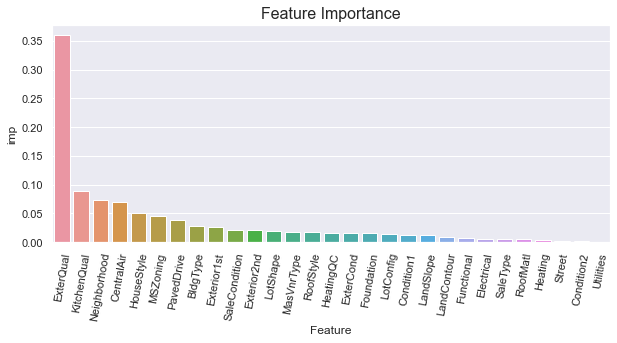

In [38]:
# Feature importance from RF Model
feat_imp=pd.DataFrame({"Feature":Xc_train.columns,"imp":model.feature_importances_})
feat_imp=feat_imp.sort_values('imp', ascending=False)

plt.figure(figsize=(10,4))
plt.title("Feature Importance", fontsize=16)
sns.barplot('Feature', 'imp', data=feat_imp)
plt.xticks(rotation=80)
plt.show()


#### Calculate Training and Validation Accuracy for different number of features

In [40]:
feat=[]
score_train=[]
score_test=[]
for i in range(29):
    imp_ft=feat_imp.head(i+1).Feature.unique()

    X_cat_imp=pd.DataFrame()
    for col in imp_ft:
        X_cat_imp[col] = le.fit_transform(X_cat[col])

    Xc_train, Xc_test, yc_train,yc_test=train_test_split(X_cat_imp,y, test_size=0.2)

    model=RandomForestRegressor(n_estimators=100)
    model.fit(Xc_train,yc_train)
    feat.append(i+1)
    score_train.append(model.score(Xc_train,yc_train))
    score_test.append(model.score(Xc_test,yc_test))
    
acc_feat_df=pd.DataFrame({"Feature":feat,"TrainAcc":score_train,"ValAcc":score_test})

C:\Users\MANOHAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MANOHAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


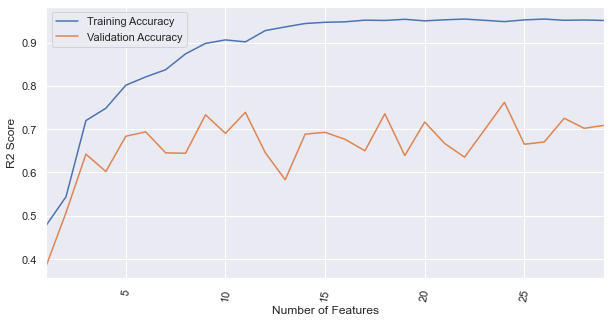

In [42]:
#Plot Number of Features vs Model Performance

plt.figure(figsize=(10,5))
sns.lineplot('Feature', 'TrainAcc', data=acc_feat_df, label="Training Accuracy")
sns.lineplot('Feature', 'ValAcc', data=acc_feat_df, label="Validation Accuracy")
plt.xlabel("Number of Features")
plt.ylabel("R2 Score")
plt.xticks(rotation=80)
plt.xlim(1,29)
plt.show()

In [45]:
#List of selected Categorical Features
cat_features=list(feat_imp.iloc[:17,0])

In [46]:
#Model Testing Only catagorical Featues

# Selecting only important features
X_cat=X_cat[cat_features]
# OHE features
X_cat=pd.get_dummies(X_cat)
# Scaling the data
X_cat=scale_df(X_cat)

In [47]:
X_train, X_val, y_train, y_val=train_test_split(X_cat,y, test_size=0.2)

In [48]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.7842246604494227
Validation score : -2.602059210842121e+24


In [49]:
model=SVR()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.9077506497368704
Validation score : 0.7565146721163638


In [50]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.9505288545490409
Validation score : 0.7139687528798515


In [51]:
model=XGBRegressor(learning_rate=0.1)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")


Train score : 0.9028612341516178
Validation score : 0.75216912220789


#### Observation:

- Linear Regression preforms very poorly in validation.
- Other three models have similar accuracy in validation, eventhough Random Forest model is overfitting.

In [53]:
#Combine train and test data
Xtt=pd.concat([X,df_test])

#Split into Numeric and categoric features
Xtt_num= Xtt[num_features]
Xtt_cat= Xtt[cat_features]

#Handling null values
Xtt_cat=handle_na(Xtt_cat, 'mode')
Xtt_num=handle_na(Xtt_num,'mean')

#OHE Categoric features
Xtt_cat=pd.get_dummies(Xtt_cat,drop_first=True)

#Combine Numeric and Categorical features
Xtt=pd.concat([Xtt_num,Xtt_cat], axis=1)

#Scale Features
Xtt=scale_df(Xtt)

#Training and Testing Features after Feature Engineering
X=Xtt.iloc[:df_train.shape[0],:]
X_test=Xtt.iloc[df_train.shape[0]:,:]

#Training and Validation features and target
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2)

<ipython-input-19-ec2a7ce863ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].mode()[0])
<ipython-input-19-ec2a7ce863ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].mean())


#### Training, Evaluation and Prediction

In [54]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")
y_LR=model.predict(X_test)

Train score : 0.8875122537674849
Validation score : -4.3461907197299686e+17


In [55]:
model=SVR()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")
y_SVR=model.predict(X_test)

Train score : 0.9367338282682589
Validation score : 0.8609874706359546


In [56]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")
y_RF=model.predict(X_test)

Train score : 0.9792392877383407
Validation score : 0.8590557574509678


In [57]:
model=XGBRegressor(learning_rate=0.1)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")
y_XGB=model.predict(X_test)

Train score : 0.9718065302223721
Validation score : 0.8716329025947073


### Observation:

- Performance of Linear Regression is very poor in validation data
- Accuracy of SVM model is reasonable
- RF model is overfitting, still gives validation accuracy better than SVM model
- XGBoost model gives the best result in validation data.